In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving fish_market_test_label.csv to fish_market_test_label.csv
Saving fish_market_test_feature.csv to fish_market_test_feature.csv
Saving fish_market_label.csv to fish_market_label.csv
Saving fish_market_feature.csv to fish_market_feature.csv


In [ ]:
feature = pd.read_csv('fish_market_feature.csv')
label = pd.read_csv('fish_market_label.csv')
X = feature.values
y = label.values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(Xs, y, test_size=0.1, random_state=3)

In [ ]:
n_epochs = 2000
batch_size = 64
model = Sequential([Dense(32, activation='relu', input_shape=(5,)), Dense(32, activation='relu'), Dense(32, activation='relu'), Dense(1, activation='linear')])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs, batch_size=batch_size)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                192       
                                                                 
 dense_25 (Dense)            (None, 32)                1056      
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
2/2 [==============================] - 1s 170ms/step - loss: 273617.6875 - mse: 273617.6875 - mae: 398.1588 - val_loss: 175873.0000 - val_mse: 175873.0000 - val_mae: 316.8

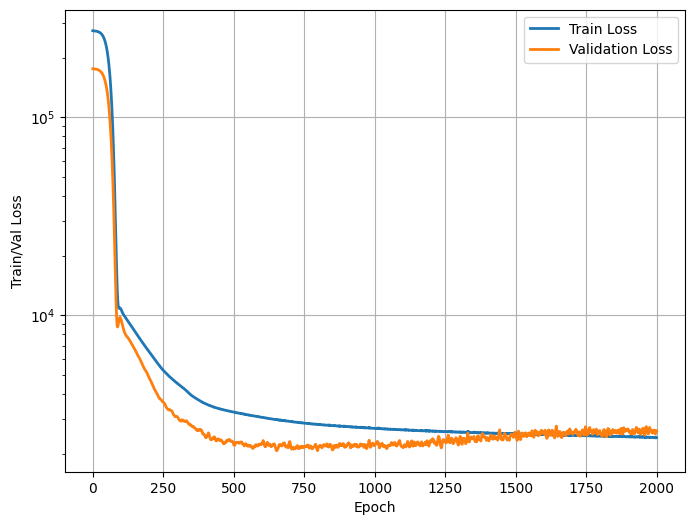

In [ ]:
plt.figure(figsize=(8,6))
plt.semilogy(np.arange(n_epochs), history.history['loss'], label='Train Loss', linewidth=2)
plt.semilogy(np.arange(n_epochs), history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Train/Val Loss')
plt.grid()
plt.legend()

1/1 [==============================] - 0s 61ms/step


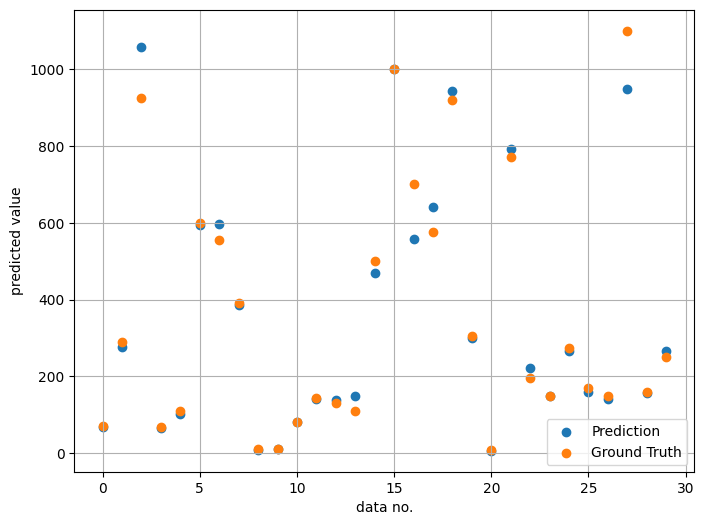

In [ ]:
X_test = pd.read_csv('fish_market_test_feature.csv').values
y_test = pd.read_csv('fish_market_test_label.csv').values
Xtest_s = scaler.transform(X_test)
y_hat = model.predict(Xtest_s)
plt.figure(figsize=(8,6))
plt.scatter(np.arange(y_hat.shape[0]), y_hat, label='Prediction')
plt.scatter(np.arange(y_test.shape[0]), y_test, label='Ground Truth')
plt.legend()
plt.xlabel('data no.')
plt.ylabel('predicted value')
plt.grid()

In [ ]:
y_hat_train = model.predict(X_train)
mse_train = np.mean((y_train - y_hat_train)**2)
rmse_train = np.sqrt(mse_train)
mae_train = np.mean(np.abs(y_train - y_hat_train))

mse_test = np.mean((y_test - y_hat)**2)
rmse_test = np.sqrt(mse_test)
mae_test = np.mean(np.abs(y_test - y_hat))
print(f"The Train MSE is: {mse_train}")
print(f"The Train Root MSE is: {rmse_train}")
print(f"The Train MAE is: {mae_train}")
print()
print(f"The Test MSE is: {mse_test}")
print(f"The Test Root MSE is: {rmse_test}")
print(f"The Test MAE is: {mae_test}")

4/4 [==============================] - 0s 2ms/step
The Train MSE is: 2404.9795695848597
The Train Root MSE is: 49.04059104032964
The Train MAE is: 28.17431881964744

The Test MSE is: 2379.725778400249
The Test Root MSE is: 48.78243309225411
The Test MAE is: 26.079119173685708
